In [1]:
import pandas as pd
import numpy as np
import hashlib as hl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/narayani/Desktop/IIITB/Sem6/ML/ML_Project/Housing_Logistic Regression/data/D3.csv')

In [3]:
data.head()

,Unnamed: 0,1,2,3,4,5,6,7
0,0,0.195798,0.274106,-0.939997,0.028068,0.044240,0.013813,1
1,1,0.309739,0.264959,-0.913133,0.002043,0.006119,0.002161,1
2,2,0.264859,0.245184,-0.918893,0.112745,0.106892,0.035098,0
3,3,0.337062,0.320293,-0.885321,0.001099,0.002505,0.001011,1
4,4,0.351365,0.304930,-0.885185,0.001344,0.002241,0.001036,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 8 columns):
Unnamed: 0    2254 non-null int64
1             2254 non-null float64
2             2254 non-null float64
3             2254 non-null float64
4             2254 non-null float64
5             2254 non-null float64
6             2254 non-null float64
7             2254 non-null int64
dtypes: float64(6), int64(2)
memory usage: 140.9 KB


In [5]:
filter_data = data.drop(data.columns[0], axis=1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcee45898d0>,
      dtype=object)

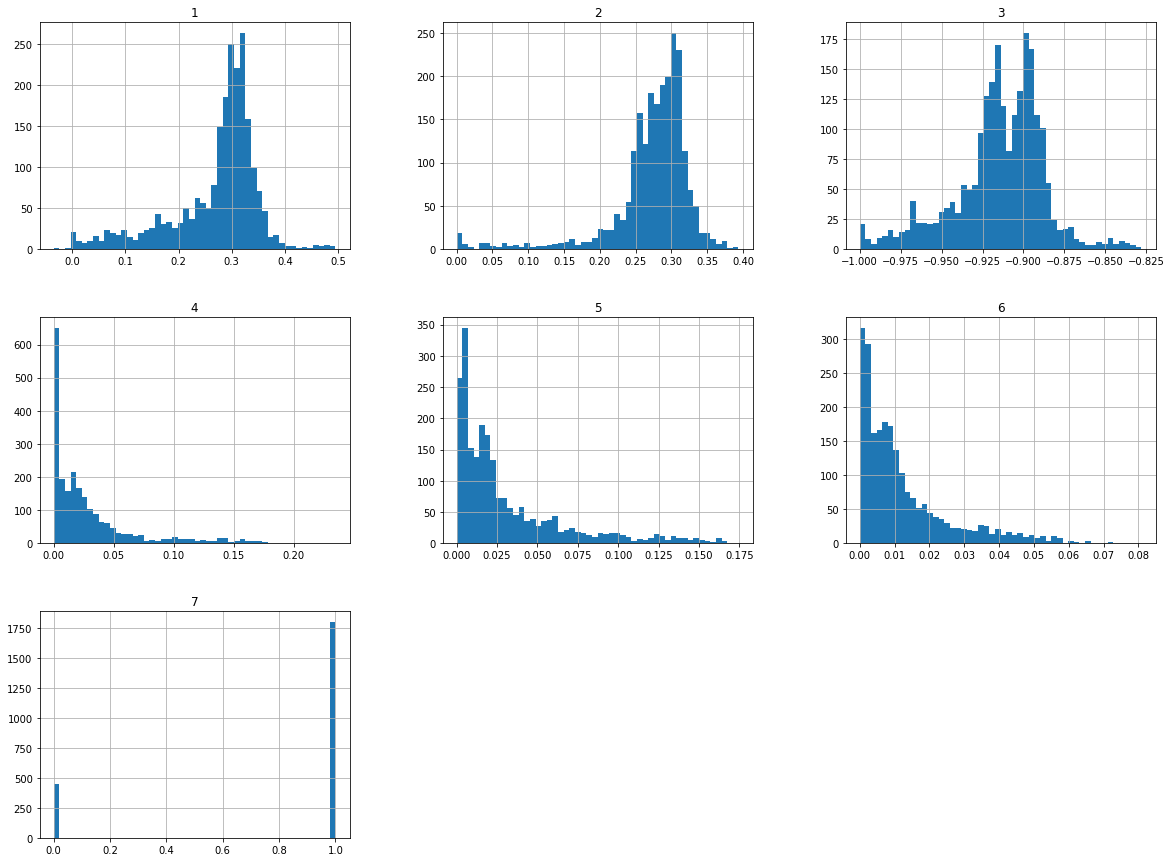

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
filter_data.hist(bins=50, figsize=(20,15))

In [7]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(filter_data, test_size=0.2, random_state = 42)

In [8]:
data1 = train_set.copy()

/home/naman/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fced6b70fd0>,
      dtype=object)

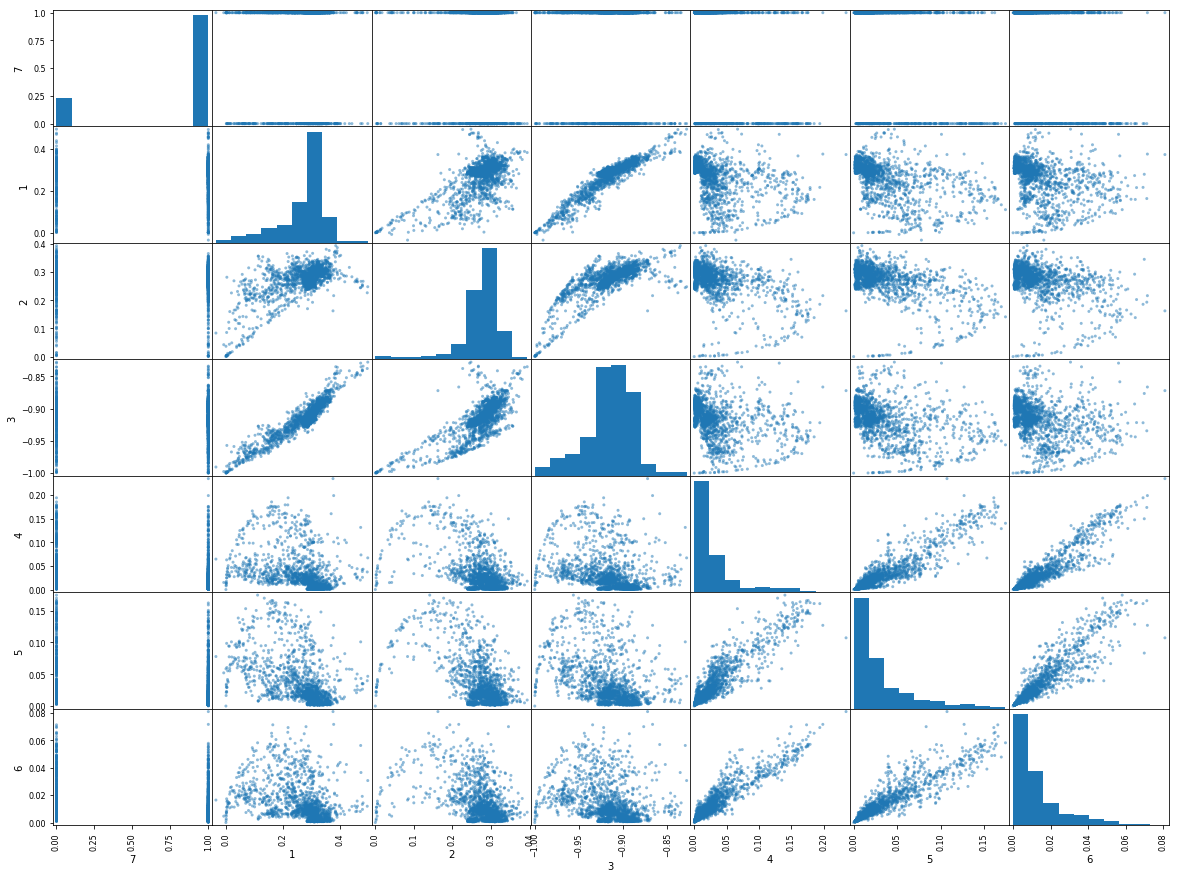

In [10]:
from pandas.tools.plotting import scatter_matrix

attributes = [ filter_data.columns[6],filter_data.columns[0],filter_data.columns[1],filter_data.columns[2],filter_data.columns[3],filter_data.columns[4],filter_data.columns[5]]
scatter_matrix(data1[attributes], figsize=(20, 15))

# Nearest Neighbour

In [12]:
import csv
import math
import random

In [13]:
training_data = train_set.copy()#to copy train_set data to training_data, to prevent changes in train_set data
test_data = test_set.copy()

In [14]:
training_data_matrix = training_data.as_matrix() # to convert pandas into numpy array
test_data_matrix = test_data.as_matrix()

In [15]:
# to calculate distance between two data instances 
def distance(data1, data2, dim):
    val = 0
    for i in range(dim):
        val = val + (data1[i] - data2[i])*(data1[i]-data2[i])
    return math.sqrt(val)

In [16]:
# to calculate the nearest neigbour(least distance) of the new data instance from existing train data instances
def nn(training, newdata):
    min = distance(newdata, training[0], 4)
    nearest = training[0]
    for i in range(len(training)):
        if(min > distance(newdata, training[i], 4)):
            min = distance(newdata, training[i], 4)
            nearest = training[i]
    return nearest

In [17]:
#returns the target value or label of the nearest neighbour
def predict(nearest):
    label = nearest[-1]
    return label

In [18]:
# to calculate the accuracy i.e (number of correct predictions/total number of predictions)*100
def getAccuracy(actual, predictions):
	correct = 0
	for x in range(len(actual)):
		if actual[x] == predictions[x]:
			correct += 1
	return (correct/float(len(actual)))

In [19]:
predictions = []
actual = []
for i in range(len(test_data_matrix)):
    nearest = nn(training_data_matrix, test_data_matrix[i])
    real_label = predict(test_data_matrix[i])
    pred_label = predict(nearest)
    predictions.append(pred_label)
    actual.append(real_label)

In [20]:
accuracy = getAccuracy(actual,predictions)

In [27]:
print ("Accuracy = " +str(accuracy))

Accuracy = 0.818181818182


In [22]:
from sklearn import metrics
confusion = metrics.confusion_matrix(actual,predictions)
TP = confusion[1,1] # True Positive
TN = confusion[0,0] # True Negative
FP = confusion[0,1] # False Positive
FN = confusion[1,0] # False Negative

In [24]:
# Precision tells us that when a positive value is predicted, how often is the prediction incorrect
precision = (TP) / float(TP + FP)
print ("Precision = " + str(precision))

Precision = 0.8807588075880759


In [25]:
#recall(also known as sensitivity or true positive rate) tells us that when the actual value is positive, how often is the prediction correct.
recall = (TP) / float(TP + FN)
print ("Recall = " + str(recall))

Recall = 0.8953168044077136


In [26]:
#F-measure(also known as F1-score or balanced F-score) is a measure of a test's accuracy. It considers both the precision and the recall of the test to compute the score.
#F-measure = 2*(precision*recall)/(precision+recall)
f_measure = 2* (precision*recall)/float((precision+recall))
print ("F-measure = " + str(f_measure))

F-measure = 0.8879781420765027
